Data Preparation

In [229]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import os
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


register_matplotlib_converters()
plt.style.use('fivethirtyeight')

%matplotlib inline

In [230]:
os.getcwd()
os.listdir("C:\\Users\\Rob's Surface\\Desktop\\Gen_Ass\\Projects\\Final")
nba_basic = "C:\\Users\\Rob's Surface\\Desktop\\Gen_Ass\\Projects\\Final\\player_data.csv"
nba_players = pd.read_csv(nba_basic).dropna()

In [231]:
nba_players.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [232]:
nba_players.shape

(4213, 8)

In [233]:
nba_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 0 to 4549
Data columns (total 8 columns):
name          4213 non-null object
year_start    4213 non-null int64
year_end      4213 non-null int64
position      4213 non-null object
height        4213 non-null object
weight        4213 non-null float64
birth_date    4213 non-null object
college       4213 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 296.2+ KB


The non-null data sets for weight, height, and years played should be enough to find the information I desire to predict.

In [234]:
nba_players.describe(include='all')

,name,year_start,year_end,position,height,weight,birth_date,college
count,4213,4213.000000,4213.000000,4213,4213,4213.000000,4213,4213
unique,4165,NaN,NaN,7,28,NaN,3893,470
top,George Johnson,NaN,NaN,G,6-7,NaN,"June 1, 1985",University of Kentucky
freq,3,NaN,NaN,1501,441,NaN,3,99
mean,NaN,1984.062663,1988.267505,NaN,NaN,207.716117,NaN,NaN
std,NaN,20.699757,21.592122,NaN,NaN,25.447824,NaN,NaN
min,NaN,1947.000000,1947.000000,NaN,NaN,133.000000,NaN,NaN
25%,NaN,1969.000000,1972.000000,NaN,NaN,189.000000,NaN,NaN
50%,NaN,1985.000000,1990.000000,NaN,NaN,205.000000,NaN,NaN
75%,NaN,2001.000000,2007.000000,NaN,NaN,225.000000,NaN,NaN


In [235]:
nba_players.corr()

,year_start,year_end,weight
year_start,1.000000,0.978496,0.342802
year_end,0.978496,1.000000,0.352391
weight,0.342802,0.352391,1.000000


Cleaning Feature Variables

In [236]:
# making a career length column
nba_players['career_length'] = nba_players.year_end - nba_players.year_start 

# round up career lengths of less that 1 year to 1 year
nba_players['career_length'] = nba_players['career_length'].replace(0, 1)

In [237]:
# make the height column useable by spliting

new_ht = nba_players["height"].str.split("-", n = 1, expand = True)

In [238]:
# making a column for height in feet and height in inches

nba_players["height_ft"]= new_ht[0].astype(int)
nba_players["height_in"]= new_ht[1].astype(int)

In [239]:
#new column with player height in inches
nba_players['total_height_inches'] = nba_players.height_ft * 12 + nba_players.height_in

In [240]:
nba_players.head(10)

,name,year_start,year_end,position,height,weight,birth_date,college,career_length,height_ft,height_in,total_height_inches
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,4,6,10,82
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,9,6,9,81
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19,7,2,86
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,10,6,1,73
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,5,6,6,78
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California,11,6,9,81
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University,4,6,7,79
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University,1,6,3,75
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University,1,6,3,75
10,Alex Acker,2006,2009,G,6-5,185.0,"January 21, 1983",Pepperdine University,3,6,5,77


In [241]:
nba_players.loc[:, 'position'].value_counts()

G      1501
F      1202
C       406
F-C     360
G-F     336
F-G     205
C-F     203
Name: position, dtype: int64

In [242]:
nba_players.groupby(['position', 'total_height_inches']).agg({'career_length': 'mean'}).head(10)

career_length
position total_height_inches               
C        76                        1.000000
         77                        3.000000
         78                        1.000000
         79                        1.600000
         80                        2.357143

In [243]:
nba_players.groupby('position').agg({'career_length': 'mean'})

,career_length
position,
C,4.502463
C-F,6.300493
F,3.566556
F-C,6.350000
F-G,6.170732
G,4.117921
G-F,5.363095


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


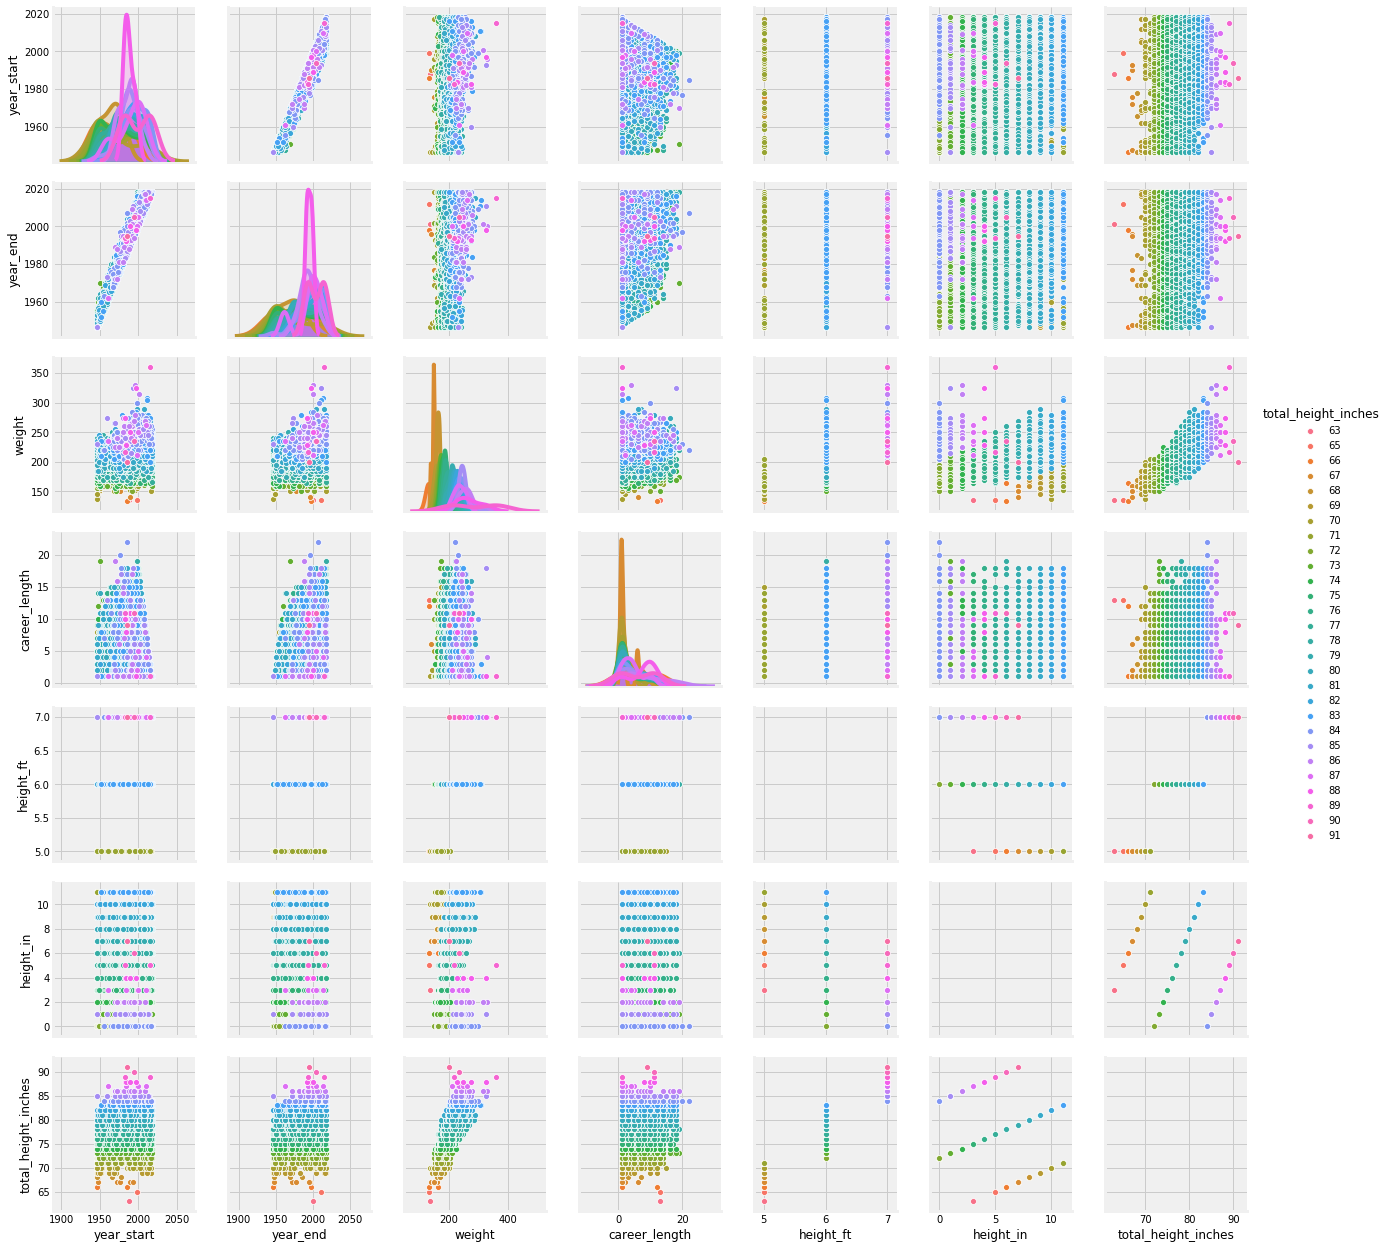

In [244]:
g = sns.pairplot(nba_players, hue='total_height_inches') ;

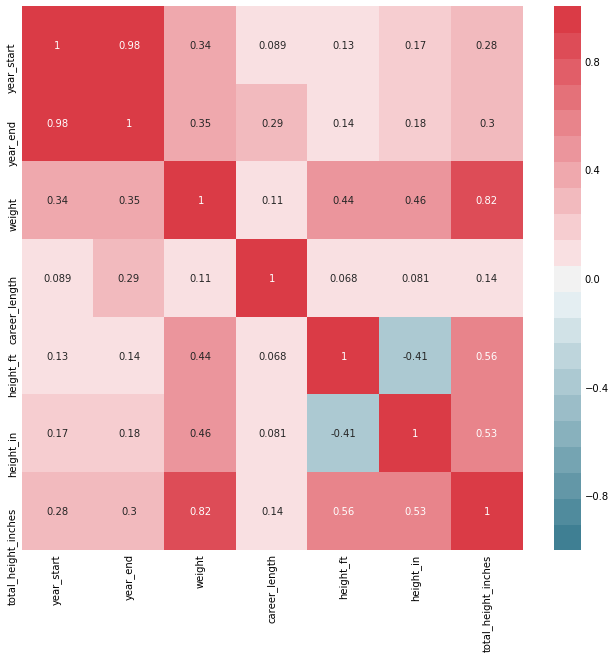

In [245]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(nba_players.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
           );

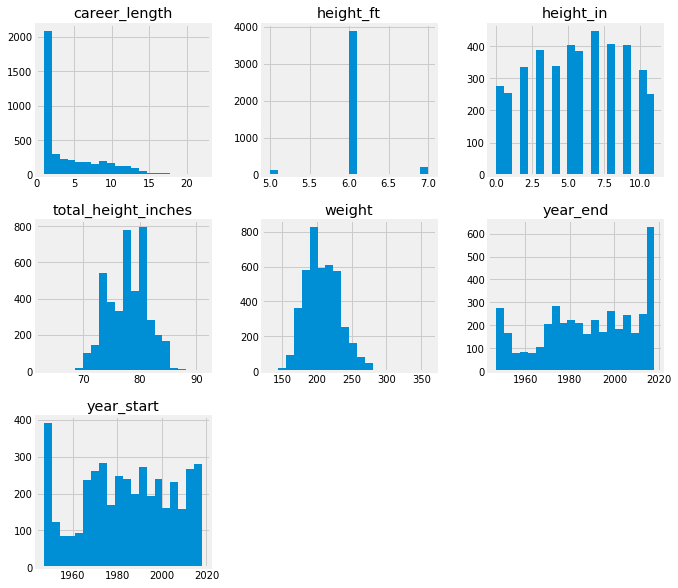

In [246]:
nba_players.hist(figsize=(10, 10), bins=20);

In [247]:
# I am getting dummy values for the seven positions

nba_players = pd.get_dummies(nba_players, columns=['position'], drop_first=True)

In [248]:
nba_players.head()

,name,year_start,year_end,height,weight,birth_date,college,career_length,height_ft,height_in,total_height_inches,position_C-F,position_F,position_F-C,position_F-G,position_G,position_G-F
0,Alaa Abdelnaby,1991,1995,6-10,240.0,"June 24, 1968",Duke University,4,6,10,82,0,0,1,0,0,0
1,Zaid Abdul-Aziz,1969,1978,6-9,235.0,"April 7, 1946",Iowa State University,9,6,9,81,1,0,0,0,0,0
2,Kareem Abdul-Jabbar,1970,1989,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19,7,2,86,0,0,0,0,0,0
3,Mahmoud Abdul-Rauf,1991,2001,6-1,162.0,"March 9, 1969",Louisiana State University,10,6,1,73,0,0,0,0,1,0
4,Tariq Abdul-Wahad,1998,2003,6-6,223.0,"November 3, 1974",San Jose State University,5,6,6,78,0,1,0,0,0,0


In [249]:
# Splitting columns into target and features 
# the goal is to find the physical feature that can help predict career lenght
# the first test is the linear regression 

target_col = 'career_length'
feature_cols = ['total_height_inches',
                'weight','position_C-F', 'position_F', 'position_F-C', 'position_F-G', 'position_G', 'position_G-F']


X = nba_players.loc[:,feature_cols]

y = nba_players.loc[:,target_col]

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 16)

# Creating a linear regression model instance and fitting the training data to it
lr_nba_players = LinearRegression()
lr_nba_players.fit(X_train, y_train)
lr_nba_players.score(X_test, y_test)

# Evaluating the model 
print('Test Data R-Squared:', lr_nba_players.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_nba_players.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_nba_players.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.07765728201015731
Training Data R-Squared: 0.07911388686984577
Test Data RMSE: 3.9804336526948725
Test Data MAE: 3.268547969730358


In [250]:
#setting up a negtive rmse scorer for use in models

from sklearn.metrics.scorer import make_scorer
def neg_rmse(y_true, y_pred):
    mse = np.square(y_true - y_pred).mean()
    return -np.sqrt(mse)

neg_rmse = make_scorer(neg_rmse)

In [266]:
# I am conducting 10-fold cross-validation with a defined max depth range on the nba data

from sklearn.model_selection import GridSearchCV, KFold

max_depth_range = list(range(1, 10))

kf = KFold(10, shuffle=True, random_state=16)

grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=200, random_state=16),
                    param_grid={'max_depth': max_depth_range},
                    cv=kf,
                    return_train_score=True,
                    scoring=neg_rmse,
                   )
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=16, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=16, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(neg_rmse), verbose=0)

In [252]:
# I need to get the scores from the 10-fold cross-validation

rmse_df = -pd.DataFrame(grid.cv_results_).loc[:, [f'split{i}_test_score' for i in range(10)]]
scores = rmse_df.sum(axis='columns')

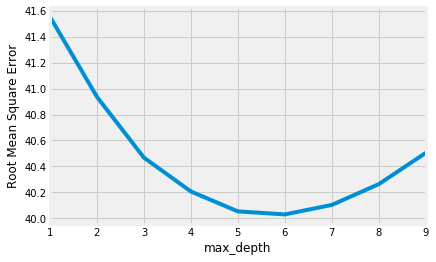

In [253]:
# I am graphing the 10-fold cross-validation results

scores.index = max_depth_range
ax = scores.plot()
ax.set_xlabel('max_depth');
ax.set_ylabel('Root Mean Square Error');

In [267]:
# now I need to find the best score in of the 10-fold cross-validation

grid.best_score_, grid.best_params_

(-4.002886698734851, {'max_depth': 6})

In [272]:
rfreg = RandomForestRegressor(
    n_estimators=100,
    max_depth=grid.best_params_['max_depth'],
    oob_score=True,
    random_state=1
)
rfreg.fit(X, y)
print(rfreg.score(X_train, y_train))
print(rfreg.score(X_test, y_test))

0.15940377857832233
0.13972417874382004


In [274]:
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
6,position_G,0.018783
7,position_G-F,0.037465
2,position_C-F,0.045201
5,position_F-G,0.058658
4,position_F-C,0.081637
3,position_F,0.110877
1,weight,0.303286
0,total_height_inches,0.344093


In [273]:
print(rfreg.oob_score_)

0.09865220986646006
